# Population Dynamics

In a population, the growth of that population is generally proportional to the current size of the population. This makes sense because big populations can grow faster than small populations. It will take much longer for a population of 10 rabbits to make 10 more rabbits than it will for a population of 100 rabbits to make 10 rabbits. 

From this, we get a differential equation: $\frac{dN}{dt}=rN$. In words, this means that the growth of a population of size $N$ is proportional to the size of the population multiplied by some constant $r$. 

This is a fairly good model, but the population will explode and go toward infinity which is not realistic. Instead, in the real world, each habitat has a natural "carrying capacity" which is the maximum number of a given organism that the habitat can sustain.

Factoring this into our model, we get: $\frac{dN}{dt}=rN\frac{C-N}{C}$ 

The $\frac{C-N}{C}$ term will be close to $1$ when the population is small so it will allow for maximum growth, but it will get closer and closer to zero as the population approaches the carrying capacity. It will even go negative and cause the population to decrease if it goes above the carrying capacity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#The function to get the change in population. 
def dNdt(r, N, C):
    return r*N*(C-N)/C

#Plot a specific population from starting conditions. 
def simulate_population(N0, r, C, years, res):
    ys = [N0]
    N = N0
    for i in range(years*res - 1): 
        N = N + dNdt(r, N, C)/res
        ys.append(N)
    return ys

Now for a quick example. Let's assume we have a population of rabbits. They live in a field that can sustainably support 100 rabbits and the starting population size is 10 with a growth rate of 1.3. 

It is important to note that this model assumes that there are not any predators that affect population growth. We will get to predator/prey relationships in a bit.

Text(0, 0.5, 'Population Size')

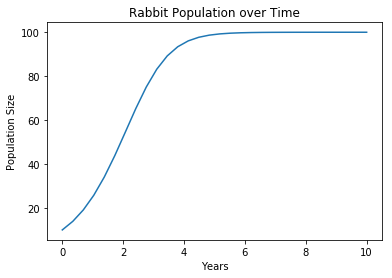

In [2]:
xs = np.linspace(0, 10, num=30)
ys = simulate_population(10, 1.3, 100, 10, 3)
plt.plot(xs, ys)
plt.title("Rabbit Population over Time")
plt.xlabel("Years")
plt.ylabel("Population Size")

Now let's take another example where these 100 rabbits are put in an enclosure that can only support 50 rabbits.

Text(0, 0.5, 'Population Size')

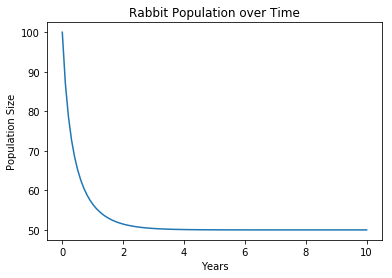

In [3]:
xs = np.linspace(0, 10, num=100)
ys = simulate_population(100, 1.3, 50, 10, 10)
plt.plot(xs, ys)
plt.title("Rabbit Population over Time")
plt.xlabel("Years")
plt.ylabel("Population Size")


# Lotka-Volterra Equations

Now, this is good for modeling a single species. But what if we want to model two species interacting with each other. For example, model wolf and deer populations. As the deer population increases, it provides food for the wolf population. This causes the wolf population to increase, hunting more deer and therefore causing the deer population to decrease. This will cause a cycle if it is in a stable state. 

There was a model to do this that was created by Alfred J. Lotka and Vito Volterra in 1925-1926. It describes the number of prey ($x$) and the number of preditors ($y$) in a system. There are two equations, one to describe the preditors and one to describe the prey.

$\frac{dx}{dt}=\alpha x - \beta xy$

$\frac{dy}{dt}=\delta xy - \gamma y$

Before we go any further, there are a few conditions that are necessary for this model to be applicable:

- The prey population can always find enough food. 
- The food of the predator population is exclusively the prey population. 
- The rate of change of a population is proportional to its size. 
- The environment remains largely constant and doesn't change to favor one species over another. 
- Preditors are always hungry and will eat any prey they can get. 

Here, $\alpha, \beta, \delta, \gamma$ are positive real numbers that govern the interaction of the predator and prey relationship. 

$\alpha$ is the growth rate of the prey population. We see this in the equations because $\frac{dx}{dt}=\alpha x$ (ignoring the other term.) It is essentially the same equation modeling exponential growth that we have above. The prey population growth is reduced by predation, which is proportional to the rate at which predators and prey meet in the wild. Hence, the  $- \beta xy$ term. 

On the preditor side, the growth rate of the predators is proportional to the amount of predation. We can see this in the equation $\frac{dy}{dt}=\delta xy$ (ignoring the other term.) The predator population is also reduced by natural death and emigration. This change is proportional to the size of the predator population, shown by the $- \gamma y$ term.

This gives us a set of differential equations that define how a population in a given start condition will behave. 

In [4]:
def dx(a, b, x, y): 
    return a*x - b*x*y

def dy(d, g, x, y):
    return d*x*y - g*y

def lv(a, b, d, g, x, y, t, res):
    xs = [x]
    ys = [y]
    
    for i in range(t*res - 1):
        x = x + dx(a, b, x, y)/res
        y = y + dy(d, g, x, y)/res
        xs.append(x)
        ys.append(y)
    return xs, ys

Now, let's model some predator-prey systems. 

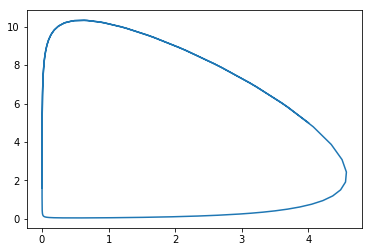

In [5]:
x,y = lv(2, 1, 2, 1, 4, 5, 10, 30)
plt.plot(x, y)

Instead of plotting it as a parametric curve, we plotted both x and y as functions of t, then we can get some more insights. We can see more clearly how the predator and prey populations interact with each other.

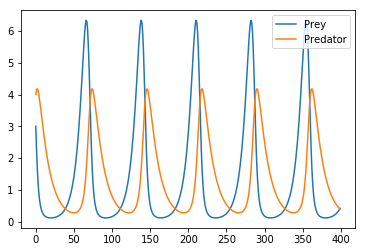

In [6]:
x1,x2 = lv(3, 2, 1, 1.5, 3, 4, 20, 20)
plt.plot(x1, label="Prey")
plt.plot(x2, label="Predator")

plt.legend()

This is exactly what we would expect to see. As the prey increase, so do the predators until there are so many predators that the prey decrease, causing the predators to decrease, bringing us back to the beginning of the cycle.

We can see a similar pattern in real-world data. (Source: phschool.com.)

![Population Data](https://lh3.googleusercontent.com/proxy/ST8a860hNAChUL89v_a2Qjzn6lr_b04rU_ij5x2TiQrBWkQBh8tceukgPARri80STwTMUWQY-QftEN9nZuU1Tlx1dbWu1DA0UNH3BQy5fMR4nYiQWJ8cj7HcMfE_DZNnK5Pu_1-1f7cdkyypcqDGFwrvb5V9KOwf4jQAE62m2w)

We see that as the moose population decreases, so does the wolf population. Inversely, as the moose population recovers, the wolf population starts to recover as well. 


Finally, lets animate some of the components to see how each of the parameters ($\alpha, \beta, \delta, \gamma$) affect the populations.

We will animate $\alpha$ from 1 to 10. 

In [7]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
#plt.style.use('seaborn-notebook')
#print(plt.style.available)

xs = []
ys = []
for i in range(5, 50):
    x,y = lv(i/5, 1, 1, 1, 1, 2, 10, 100)
    xs.append(x)
    ys.append(y)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 10))
ax.set_ylim(( -2, 10))

line = ax.plot(xs[0], ys[0])[0]

def animate(i):
    line.set_ydata(ys[i])
    line.set_xdata(xs[i])
    
anim = FuncAnimation(fig, animate, interval=100, frames=len(xs)-1)
plt.close(anim._fig)
HTML(anim.to_html5_video())

Now, lets animate $\beta$.

In [8]:
xs = []
ys = []
for i in range(5, 50):
    x,y = lv(1, i/5, 1, 1, 5, 1, 20, 100)
    xs.append(x)
    ys.append(y)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 10))
ax.set_ylim(( -2, 10))

line = ax.plot(xs[0], ys[0])[0]

def animate(i):
    line.set_ydata(ys[i])
    line.set_xdata(xs[i])
    
anim = FuncAnimation(fig, animate, interval=100, frames=len(xs)-1)
plt.close(anim._fig)
HTML(anim.to_html5_video())

 Now, lets animate $\delta$.

In [9]:
xs = []
ys = []
for i in range(5, 50):
    x,y = lv(1, 1, i/5, 1, 5, 1, 60, 100)
    xs.append(x)
    ys.append(y)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 10))
ax.set_ylim(( -2, 10))

line = ax.plot(xs[0], ys[0])[0]

def animate(i):
    line.set_ydata(ys[i])
    line.set_xdata(xs[i])
    
anim = FuncAnimation(fig, animate, interval=100, frames=len(xs)-1)
plt.close(anim._fig)
HTML(anim.to_html5_video())

We can see that as $\delta$ increases, the number of predators greatly increases causing the number of prey to decrease dramatically and hit zero before anything can recover. This would be an example of a system that is not stable. 

In [10]:
xs = []
ys = []
for i in range(5, 50):
    x,y = lv(1, 1, 1, i/5, 5, 1, 10, 100)
    xs.append(x)
    ys.append(y)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 10))
ax.set_ylim(( -2, 10))

line = ax.plot(xs[0], ys[0])[0]

def animate(i):
    line.set_ydata(ys[i])
    line.set_xdata(xs[i])
    
anim = FuncAnimation(fig, animate, interval=100, frames=len(xs)-1)
plt.close(anim._fig)
HTML(anim.to_html5_video())

As $\gamma$ increases, predators are dying faster. This means that the take a larger number of prey to support them. We can see this from the way that the "loop" keeps extending to the right. 